In [117]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [118]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')


In [119]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [120]:
my_data = pd.read_csv('./data/drug200.csv',delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [121]:
my_data.info() # size of data
my_data.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age                                                         8863
Sex            FMMFFFFMMMFFMFFFMMMFMMMFFFMFFMFMMFMMMMFMFFMMFF...
BP             HIGHLOWLOWNORMALLOWNORMALNORMALLOWNORMALLOWLOW...
Cholesterol    HIGHHIGHHIGHHIGHHIGHHIGHHIGHHIGHHIGHNORMALHIGH...
Na_to_K                                                   3216.9
Drug           drugYdrugCdrugCdrugXdrugYdrugXdrugYdrugCdrugYd...
dtype: object

#### Pre-processing

In [122]:
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values.

In [123]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])



In [124]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['HIGH','LOW','NORMAL'])
X[:,2] = le_BP.transform(X[:,2])

In [125]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['HIGH','LOW','NORMAL'])
X[:,3] = le_Chol.transform(X[:,3])

In [126]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [127]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Setting up the Decision Tree

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state=3)

In [130]:
print(X_trainset.shape)
print(y_trainset.shape)



(140, 5)
(140,)


In [131]:
print(X_testset.shape)
print(y_testset.shape)


(60, 5)
(60,)


### Modeling

In [132]:
drugTree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

In [134]:
predTree = drugTree.predict(X_testset)

In [135]:
print(predTree[:10])
print(y_testset[:10])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
Name: Drug, dtype: object


### Evaluation

In [136]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Tree's Accuracy:  0.9833333333333333


In [137]:
import copy 
testset =copy.deepcopy(y_testset)



In [138]:
num = []
for i in range(0,len(testset)):
    num.append(i)

In [139]:
testset.index = num

In [140]:
testset[:4]

0    drugY
1    drugX
2    drugX
3    drugX
Name: Drug, dtype: object

In [141]:
score = []
for i in range(0, len(testset)):
    if testset[i] == predTree[i]:
        score.append(1)
   

In [142]:
score_df = pd.DataFrame(score)

In [143]:
score_df.columns = ['Values']

In [144]:
score_df[:4]

,Values
0,1
1,1
2,1
3,1


In [145]:
score_df['Values'].mean()

1.0

In [146]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [147]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

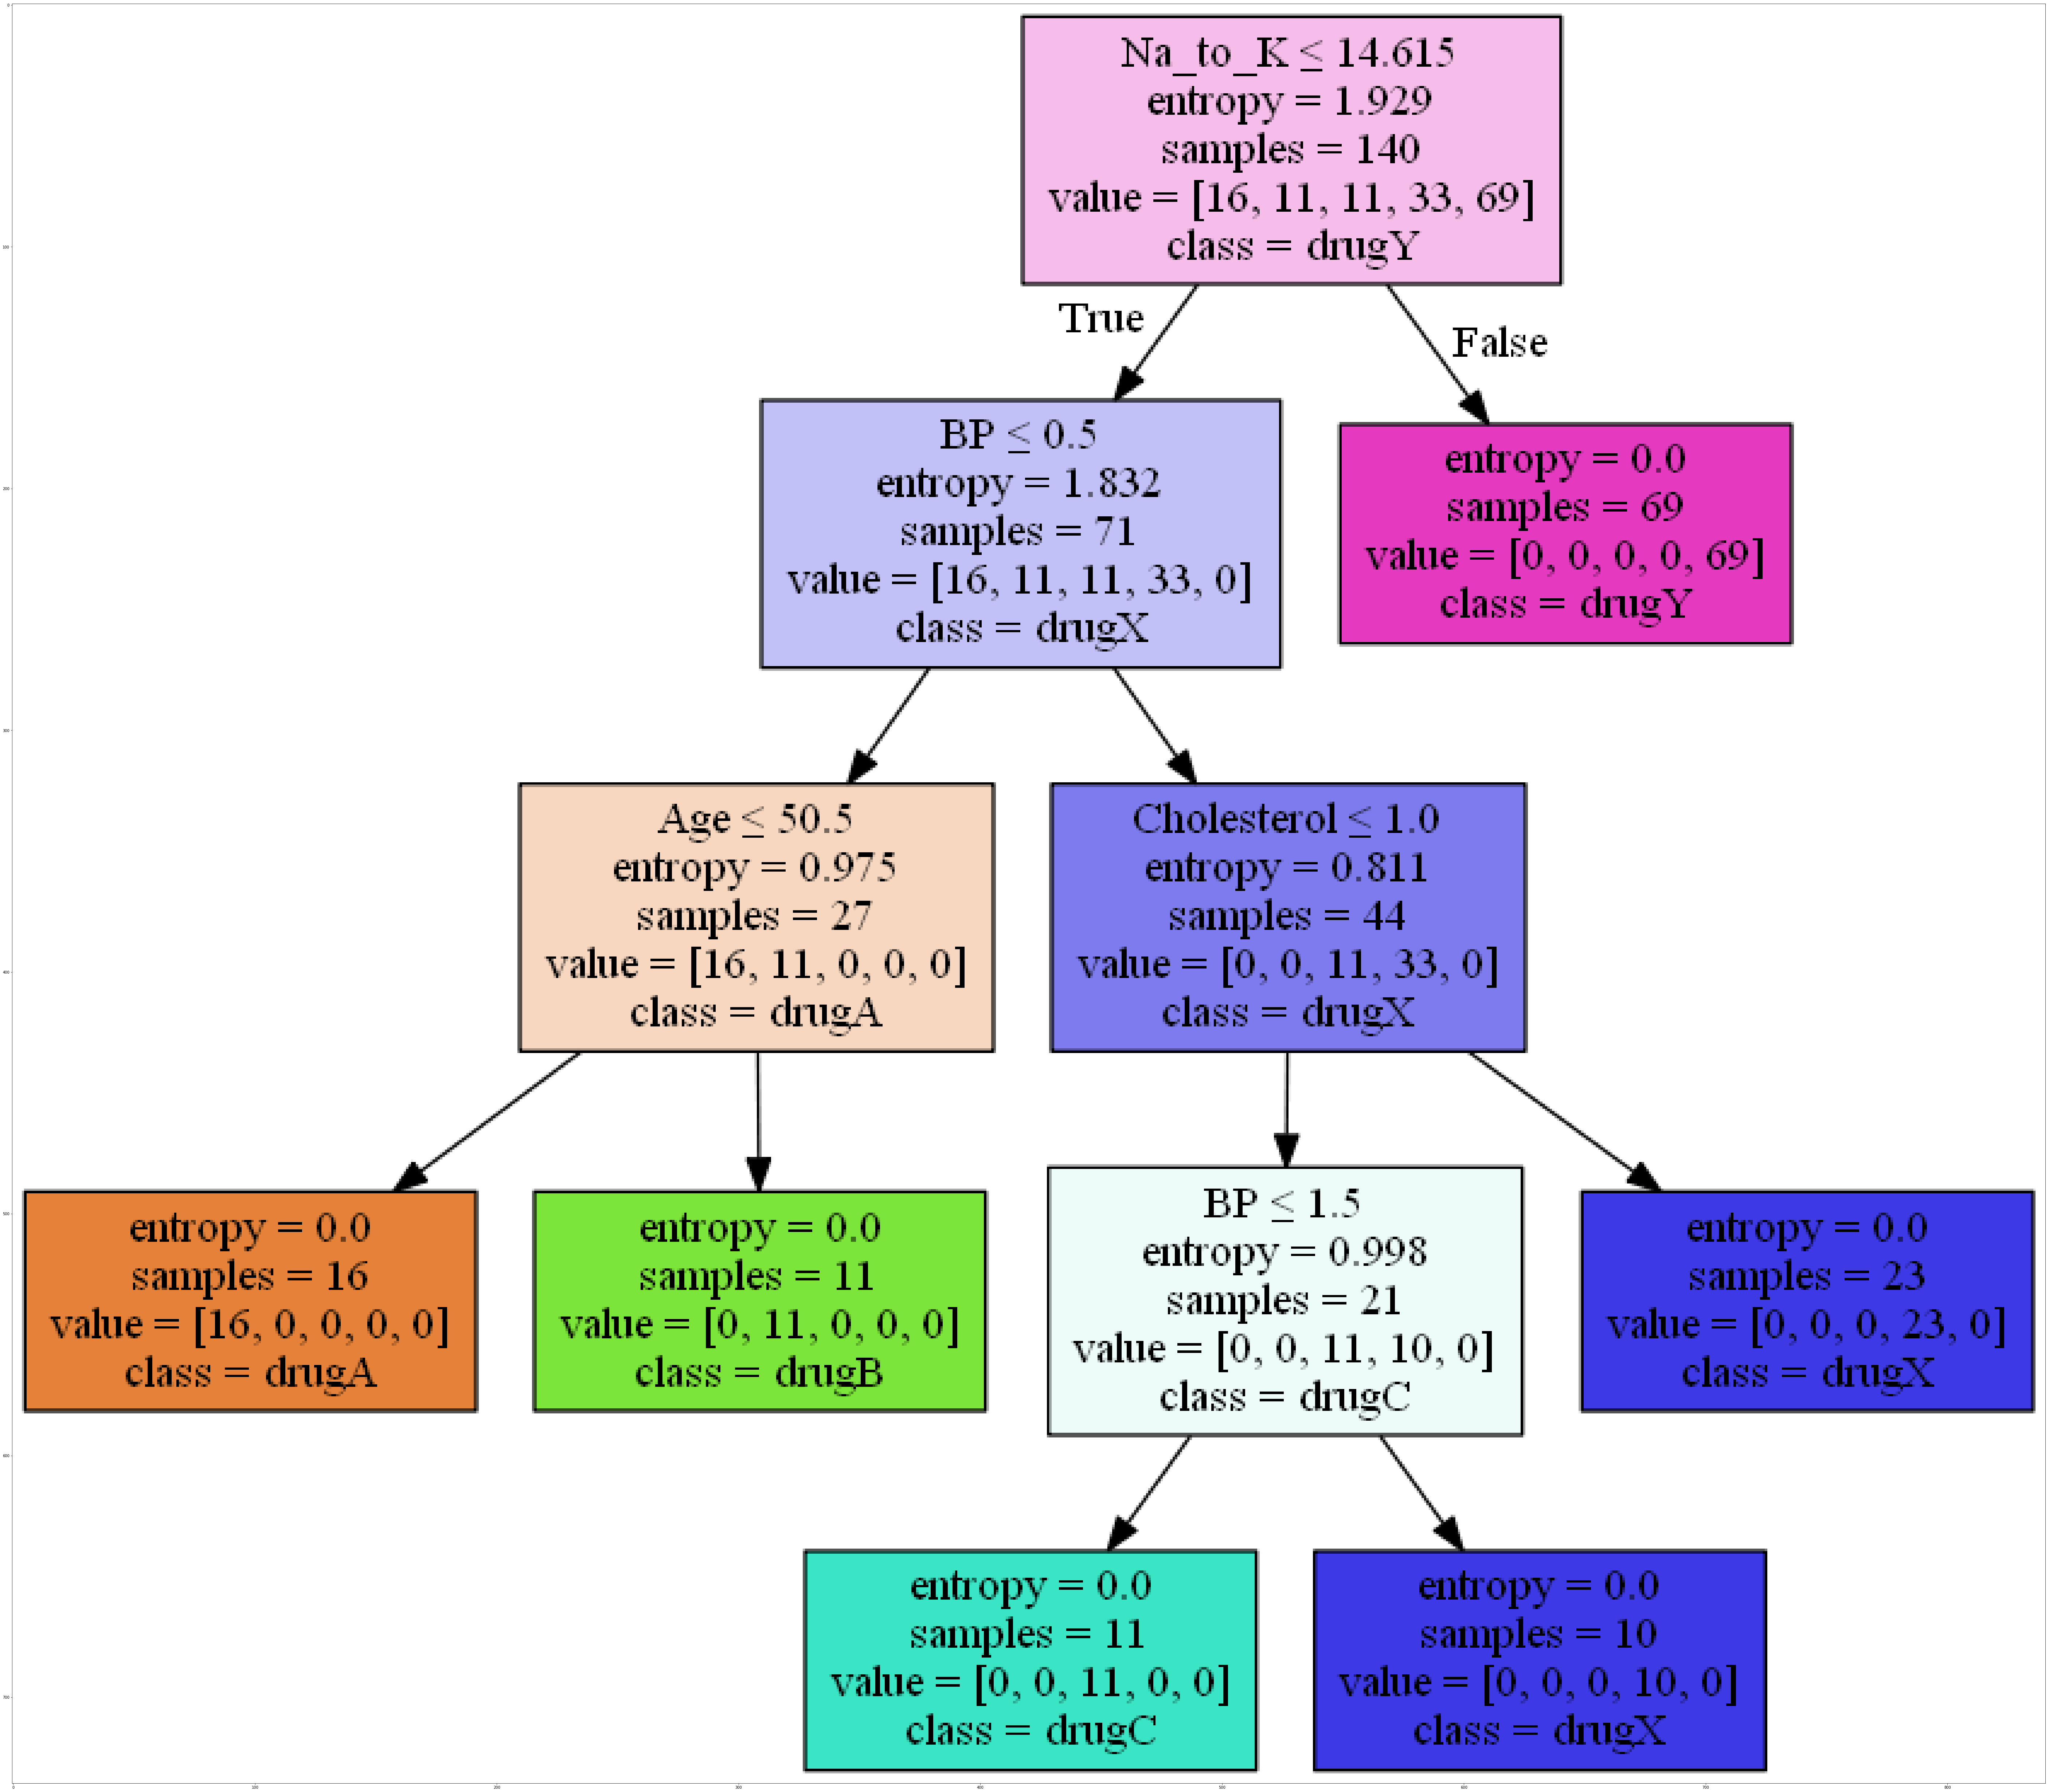

In [148]:
dot_data =StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree, feature_names=featureNames, out_file=dot_data, class_names =np.unique(y_trainset),filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img, interpolation='nearest')